In [5]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

country_data = pd.read_csv("D:/Megha/DataScienceCourse/DSMP2/data/archive/Country-data.csv")

In [6]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# Dropping country column for clustering
data_for_clustering = country_data.drop('country', axis=1)

# Standardising the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Applying agglomerative clustering
linkage_matrix =linkage(data_scaled, method='ward')

Text(0, 0.5, 'Distance')

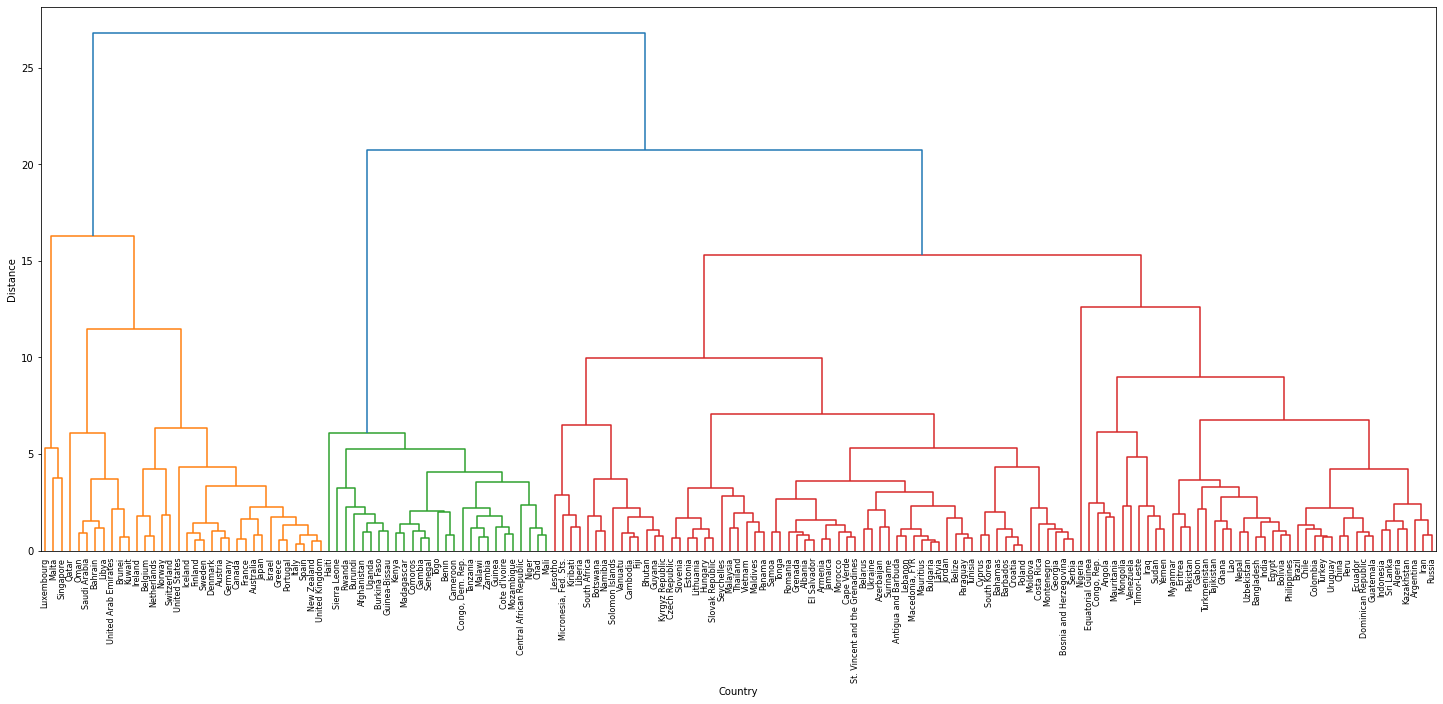

In [11]:
plt.figure(figsize=(25,10))
dendrogram(linkage_matrix, labels=country_data['country'].values, leaf_font_size=8)
plt.xlabel("Country")
plt.ylabel('Distance')

In [13]:
from scipy.cluster.hierarchy import fcluster

cluster2 = fcluster(linkage_matrix,2,criterion='maxclust')
country_data['cluster2'] = cluster2
mean_features2=country_data.groupby('cluster2').mean()
mean_features2
# orange wale countries k mean and the rest(green red) k mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster2,,,,,,,,,
1,5.961765,58.508824,8.501176,48.902941,47588.235294,4.11550,79.982353,1.888529,43170.588235
2,46.529323,36.660895,6.384812,46.375683,9362.127820,8.71909,68.145865,3.218797,5242.210526


In [14]:
from scipy.cluster.hierarchy import fcluster

cluster3 = fcluster(linkage_matrix,3,criterion='maxclust')
country_data['cluster3'] = cluster3
mean_features3=country_data.groupby('cluster3').mean()
mean_features3
# upar se 2nd line pe cut -> taking 3 clusters orange, green and red

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster2
cluster3,,,,,,,,,,
1,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235,1
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889,2
3,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925,2


In [15]:
from scipy.cluster.hierarchy import fcluster

cluster4 = fcluster(linkage_matrix,4,criterion='maxclust')
country_data['cluster4'] = cluster4
mean_features4=country_data.groupby('cluster4').mean()
mean_features4


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster2,cluster3
cluster4,,,,,,,,,,,
1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1,1
2,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355,1,1
3,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889,2,2
4,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925,2,3
